In [1]:
import pandas as pd
import numpy as np

# Índices jerárquicos

In [2]:
index = [
    ('California', 2000), 
    ('California', 2010),
    ('New York', 2000),
    ('New York', 2010),
    ('Texas', 2000), 
    ('Texas', 2010),
]

populations = [
    33871648, 
    37253956,
    18976457,
    19378102,
    20851820,
    25145561,
]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [3]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [4]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

---

In [5]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [6]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [7]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

---

In [8]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [9]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [10]:
pop_df.stack().reset_index()

,level_0,level_1,0
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [11]:
pop_df.reset_index()

,index,2000,2010
0,California,33871648,37253956
1,New York,18976457,19378102
2,Texas,20851820,25145561


# Prueba

In [12]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6],
    'B': [5, 1, 4, 2, 5, 9],
    'C': [6, 3, 7, 3, 9, 4],
    'D': [0, 7, 3, 7, 1, 7],
})
df

,A,B,C,D
0,1,5,6,0
1,2,1,3,7
2,3,4,7,3
3,4,2,3,7
4,5,5,9,1
5,6,9,4,7


In [13]:
df.set_index(['D', 'C']).drop(7, axis=0, level=0).sort_index()['B']

D  C
0  6    5
1  9    5
3  7    4
Name: B, dtype: int64

---

In [14]:
pop_df = pd.DataFrame({
    'total': pop,
    'under18': [
        9267089,
        9284094,
        4687374,
        4318033,
        5906301,
        6879014,
    ],
})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [15]:
f_u18 = pop_df['under18'] / pop_df['total']

In [16]:
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [17]:
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


---

In [18]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.880638  0.488149
  2  0.979563  0.144865
b 1  0.940732  0.064000
  2  0.778147  0.179964

In [19]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}

pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [20]:
pd.MultiIndex.from_arrays([
    ['a', 'a', 'b', 'b'],
    [1, 2, 1, 2],
])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [21]:
pd.MultiIndex.from_tuples([
    ('a', 1),
    ('a', 2),
    ('b', 1),
    ('b', 2),
])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [22]:
pd.MultiIndex.from_product([
    ['a', 'b'],
    [1, 2],
])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [23]:
pd.MultiIndex.from_product([
    'ab',
    [1, 2],
])

TypeError: Input must be list-like

---

In [ ]:
pop

In [24]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

---

In [25]:
index = pd.MultiIndex.from_product(
    [[2013, 2014], [1, 2]],
    names=['year', 'visit']
)

columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
    names=['subject', 'type']
)

In [26]:
data = np.round(np.random.randn(4, 6), 1)

In [27]:
data

array([[-0.8, -1. , -1.8, -1.1,  0.9,  2.2],
       [ 0.6, -0.8, -0.6, -1.2, -0. , -2.3],
       [ 0. , -0.5, -0.5,  0.9,  1.5, -0.4],
       [-1.4, -0.4, -0.5, -1. , -1.3,  1.4]])

In [28]:
data[:, ::2]

array([[-0.8, -1.8,  0.9],
       [ 0.6, -0.6, -0. ],
       [ 0. , -0.5,  1.5],
       [-1.4, -0.5, -1.3]])

In [29]:
data[:, ::2] *= 10

In [30]:
data

array([[ -8. ,  -1. , -18. ,  -1.1,   9. ,   2.2],
       [  6. ,  -0.8,  -6. ,  -1.2,  -0. ,  -2.3],
       [  0. ,  -0.5,  -5. ,   0.9,  15. ,  -0.4],
       [-14. ,  -0.4,  -5. ,  -1. , -13. ,   1.4]])

In [31]:
data += 37

In [32]:
data

array([[29. , 36. , 19. , 35.9, 46. , 39.2],
       [43. , 36.2, 31. , 35.8, 37. , 34.7],
       [37. , 36.5, 32. , 37.9, 52. , 36.6],
       [23. , 36.6, 32. , 36. , 24. , 38.4]])

In [33]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  36.0  19.0  35.9  46.0  39.2
     2      43.0  36.2  31.0  35.8  37.0  34.7
2014 1      37.0  36.5  32.0  37.9  52.0  36.6
     2      23.0  36.6  32.0  36.0  24.0  38.4

In [34]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      19.0  35.9
     2      31.0  35.8
2014 1      32.0  37.9
     2      32.0  36.0

In [35]:
health_data.stack(level=0)['Temp'].unstack(level=1)[2].unstack()

/tmp/ipykernel_93/1627122964.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  health_data.stack(level=0)['Temp'].unstack(level=1)[2].unstack()


subject,Bob,Guido,Sue
year,,,
2013,36.2,35.8,34.7
2014,36.6,36.0,38.4


**Ejercicio**

Observa la advertencia:

```
FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  health_data.stack(level=0)['Temp'].unstack(level=1)[2].unstack()
```

Revisa los cambios recientes y planeados para Pandas y describe si la advertencia es relevante para esta expresión en particular. Describe también por qué la siguiente expresión no muestra la advertencia:

```python
pop_df.stack()
```

El método `stack` en Pandas sufrirá un cambio, y su implementación actual quedará obsoleta. Para adoptar la nueva implementación y evitar advertencias, se recomienda especificar el parámetro `future_stack=True`.

En el caso de `pop_df`, si no utiliza índices jerárquicos (`MultiIndex`), el método `stack` no depende de la lógica que será reemplazada, por lo que no se genera la advertencia.

---

In [36]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [37]:
pop['California', 2000]

np.int64(33871648)

In [38]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [39]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [40]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [41]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [42]:
pop[['California','Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

---

In [43]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  36.0  19.0  35.9  46.0  39.2
     2      43.0  36.2  31.0  35.8  37.0  34.7
2014 1      37.0  36.5  32.0  37.9  52.0  36.6
     2      23.0  36.6  32.0  36.0  24.0  38.4

In [44]:
health_data['Guido', 'HR']

year  visit
2013  1        19.0
      2        31.0
2014  1        32.0
      2        32.0
Name: (Guido, HR), dtype: float64

In [45]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      29.0  36.0
     2      43.0  36.2

In [46]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        29.0
      2        43.0
2014  1        37.0
      2        23.0
Name: (Bob, HR), dtype: float64

In [47]:
health_data['Bob', 'HR']

year  visit
2013  1        29.0
      2        43.0
2014  1        37.0
      2        23.0
Name: (Bob, HR), dtype: float64

---

In [48]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  36.0  19.0  35.9  46.0  39.2
     2      43.0  36.2  31.0  35.8  37.0  34.7
2014 1      37.0  36.5  32.0  37.9  52.0  36.6
     2      23.0  36.6  32.0  36.0  24.0  38.4

In [49]:
data_mean = health_data.groupby('year').mean()
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     36.0  36.10  25.0  35.85  41.5  36.95
2014     30.0  36.55  32.0  36.95  38.0  37.50

In [50]:
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     36.0  36.10  25.0  35.85  41.5  36.95
2014     30.0  36.55  32.0  36.95  38.0  37.50

In [51]:
data_mean.groupby('type', axis=1).mean()

/tmp/ipykernel_93/1579530139.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_mean.groupby('type', axis=1).mean()


type,HR,Temp
year,,
2013,34.166667,36.3
2014,33.333333,37.0


**Ejercicio**

Observa la advertencia:

```
FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_mean.groupby('type', axis=1).mean()
```

La sugerencia que hace no produce el mismo resultado, ¿Cómo podemos adaptar la sugerencia para que produzca el mismo resultado que cuando se utiliza `axis=1`?

Siguiendo la sugerencia del ```FutureWarning```, adaptamos el código para obtener el siguiente resultado:

In [52]:
data_mean.T.groupby('type').mean()


year,2013,2014
type,,
HR,34.166667,33.333333
Temp,36.300000,37.000000


Observamos que el resultado obtenido está casi en el formato deseado, pero el `DataFrame` resultante está transpuesto. Para solucionarlo, simplemente aplicamos la transposición nuevamente para obtener el resultado final esperado.

In [53]:
data_mean.T.groupby('type').mean().T

type,HR,Temp
year,,
2013,34.166667,36.3
2014,33.333333,37.0


# Combinando datos con `concat`

In [54]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

In [55]:
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
x = [[1, 2],
     [3, 4]]

np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

---

In [57]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

---

In [58]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)

In [59]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [60]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

In [61]:
df1

,A,B
1,A1,B1
2,A2,B2


In [62]:
df2

,A,B
3,A3,B3
4,A4,B4


In [63]:
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [64]:
pd.concat([df1, df2], axis=1)

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


---

In [65]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

In [66]:
df3

,A,B
0,A0,B0
1,A1,B1


In [67]:
df4

,C,D
0,C0,D0
1,C1,D1


In [68]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [69]:
pd.concat([df3, df4])

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1


---

In [70]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [71]:
x

,A,B
0,A0,B0
1,A1,B1


In [72]:
y

,A,B
2,A2,B2
3,A3,B3


In [73]:
y.index = x.index

In [74]:
pd.concat([x, y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [75]:
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [76]:
pd.concat([x, y], verify_integrity=True)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')

---

In [77]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [78]:
df5

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [79]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [80]:
pd.concat([df5, df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [81]:
pd.concat([df5, df6], join='outer')

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [82]:
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


# Combinando datos con `merge` y `join`

In [83]:
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR'],
})

df2 = pd.DataFrame({
    'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014],
})

In [84]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [85]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [86]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [87]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [88]:
df4 = pd.DataFrame({
    'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve'],
})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [89]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


---

In [90]:
df5 = pd.DataFrame({
    'group': ['Accounting', 'Accounting',
              'Engineering', 'Engineering',
              'HR', 'HR'],
    'skills': ['math', 'spreadsheets',
               'coding', 'linux',
               'spreadsheets', 'organization'],
})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [91]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [92]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


---

In [93]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [94]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [95]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [96]:
df3 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000],
})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [97]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [98]:
pd.merge(df1, df3, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [99]:
pd.merge(
    df1, df3,
    left_on='employee', 
    right_on='name',
).drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


---

In [100]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

In [101]:
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [102]:
df2a

,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [103]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [104]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


---

In [105]:
df6 = pd.DataFrame({
    'name': ['Peter', 'Paul', 'Mary'],
    'food': ['fish', 'beans', 'bread'],
},columns=['name', 'food'])

df7 = pd.DataFrame({
    'name': ['Mary', 'Joseph'],
    'drink': ['wine', 'beer'],
}, columns=['name', 'drink'])

In [106]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [107]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [108]:
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


In [109]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [110]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [111]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [112]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Joseph,NaN,beer
1,Mary,bread,wine
2,Paul,beans,NaN
3,Peter,fish,NaN


In [113]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [114]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [115]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [116]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [117]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [118]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


# Agregación y agrupamiento

In [119]:
import seaborn as sns

In [120]:
planets = sns.load_dataset('planets')

In [121]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


---

In [122]:
ran = np.random.RandomState(42)

In [123]:
ser = pd.Series(ran.rand(5))

In [124]:
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [125]:
ser.sum()

np.float64(2.811925491708157)

In [126]:
ser.mean()

np.float64(0.5623850983416314)

In [127]:
df = pd.DataFrame({'A': ran.rand(5), 'B': ran.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [128]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [129]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

---

In [130]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [131]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [132]:
planets.dropna().count()

method            498
number            498
orbital_period    498
mass              498
distance          498
year              498
dtype: int64

In [133]:
planets.dropna().sum()

method            Radial VelocityRadial VelocityRadial VelocityR...
number                                                          864
orbital_period                                        416217.777994
mass                                                     1249.64138
distance                                                   25929.97
year                                                         999674
dtype: object

---

In [134]:
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data': range(6),
}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [135]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


---

In [136]:
planets.groupby('method')

In [137]:
planets.groupby('method')['orbital_period']

In [138]:
planets.groupby('method')[['orbital_period']]

In [139]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [140]:
planets.groupby('method')[['orbital_period']].median()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4343.500000
Imaging,27500.000000
Microlensing,3300.000000
Orbital Brightness Modulation,0.342887
Pulsar Timing,66.541900
Pulsation Timing Variations,1170.000000
Radial Velocity,360.200000
Transit,5.714932


In [141]:
for (method, group) in planets.groupby('method'):
    print(f"{method:30} shape={group.shape}")

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [142]:
planets.groupby('method')['year'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Transit Timing Variations,4.0,2012.500000,1.290994,2011.0,2011.75,2012.5,2013.25,2014.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0


---

In [143]:
planets.groupby('method').agg == planets.groupby('method').aggregate

False

In [144]:
planets.groupby('method').agg([np.min, np.median, max])

/tmp/ipykernel_93/3156137707.py:1: FutureWarning: The provided callable <function min at 0x7fcae095c540> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  planets.groupby('method').agg([np.min, np.median, max])
/tmp/ipykernel_93/3156137707.py:1: FutureWarning: The provided callable <function median at 0x7fcae08a9120> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  planets.groupby('method').agg([np.min, np.median, max])
/tmp/ipykernel_93/3156137707.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  planets.groupby('method').agg([np.min, np.median, max])
/

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1    1.0   1     246.360000    631.180000   
Eclipse Timing Variations          1    2.0   2    1916.250000   4343.500000   
Imaging                            1    1.0   4    4639.150000  27500.000000   
Microlensing                       1    1.0   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1    2.0   2       0.240104      0.342887   
Pulsar Timing                      1    3.0   3       0.090706     66.541900   
Pulsation Timing Variations        1    1.0   1    1170.000000   1170.000000   
Radial Velocity                    1    1.0   6       0.736540    360.200000   
Transit                            1    1.0   7       0.355000      5.714932   
Transit Timing Variations          2    2.0   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

In [145]:
planets.groupby('method').agg(['min', 'median', 'max'])

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1    1.0   1     246.360000    631.180000   
Eclipse Timing Variations          1    2.0   2    1916.250000   4343.500000   
Imaging                            1    1.0   4    4639.150000  27500.000000   
Microlensing                       1    1.0   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1    2.0   2       0.240104      0.342887   
Pulsar Timing                      1    3.0   3       0.090706     66.541900   
Pulsation Timing Variations        1    1.0   1    1170.000000   1170.000000   
Radial Velocity                    1    1.0   6       0.736540    360.200000   
Transit                            1    1.0   7       0.355000      5.714932   
Transit Timing Variations          2    2.0   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

In [146]:
planets.dropna().groupby('method').aggregate({
    'mass': 'mean',
    'distance': 'max',
})

,mass,distance
method,,
Radial Velocity,2.511411,354.0
Transit,1.470000,178.0


# Tarea

**1.** Describe la diferencia entre:
- *Time stamp*
- *Time intervals*
- *Time deltas*

¿Qué métodos y funciones tiene Pandas para trabajar con estos conceptos?
Escribe ejemplos ilustrativos.

1. Time stamp indica un momento específico en el tiempo hasta una resolución de nanosegundos.

- Como lo creamos:
```python
    ts = pd.Timestamp('2024-11-24 12:34:56')
        

- Atributos y Métodos:
```python
    print(ts.year)        # 2024
    print(ts.month)       # 11
    print(ts.day)         # 24
    print(ts.weekday())   # (0: lunes, 6: domingo)
    print(ts.floor('D'))  # Redondea al inicio del día

2. Time intervals representan un rango de tiempo definido por un inicio y un final.

- Como lo creamos:
```python
    interval = pd.Interval(pd.Timestamp('2024-11-01'), pd.Timestamp('2024-11-30'))
    print(interval)

- Atributos y Métodos:
```python
    print(interval.left)                                  # Límite inferior
    print(interval.right)                                 # Límite superior
    print(interval.contains(pd.Timestamp('2024-11-15')))  # True si contiene el timestamp


3. Time deltas representan una duración o diferencia entre dos marcas de tiempo.

- Para crearlo existen dos maneras distintas:
```python
    delta = pd.Timedelta('2 days 3 hours')
    print(delta) # Resultado: 2 days 03:00:00
    
    ts1 = pd.Timestamp('2024-11-24 12:34:56')
    ts2 = pd.Timestamp('2024-11-26 15:00:00')
    delta = ts2 - ts1
    print(delta)  # Resultado: 2 days 02:25:04


- Operaciones Matemáticas
```python
    print(delta + pd.Timedelta('1 day'))  # Sumar 1 día
    print(delta.total_seconds())         # Duración total en segundos


**2.** Escribe ejemplos ilustrativos de la función `datetime` del módulo `datetime`, de la función `parser` del módulo `dateutil` y del método `strftime` de los objetos `datetime`.

Importamos la librerias que ocuparemos en el ejercicio 3 parte 2.

In [147]:
from datetime import datetime
from dateutil import parser

Primero estudiemos un poco la duncion `datetime` del módulo `datetime`, y veamos que podemos hacer con este.

In [148]:
# Podemos crear una datetime de una fecha específica.
dt = datetime(2024, 11, 24, 14, 30, 45)
print("Fecha y hora:", dt)

# Podemos obtener la fecha actual
ahora = datetime.now()
print("Fecha y hora actual:", ahora)

# Podemos comparar fechas
fecha1 = datetime(2024, 11, 24)
fecha2 = datetime(2024, 12, 25)
print("¿Fecha1 es anterior a Fecha2?", fecha1 < fecha2)


Fecha y hora: 2024-11-24 14:30:45
Fecha y hora actual: 2024-11-24 21:16:28.904686
¿Fecha1 es anterior a Fecha2? True


A continuacion veamos la función `parser` del módulo `dateutil`.

In [149]:
# Podemos interpretar fechas en formato de texto.
fecha1 = parser.parse("24th November 2024, 2:30 PM")
print("Fecha interpretada:", fecha1)

# En formato ISO 8601
fecha2 = parser.parse("2024-11-24T14:30:45")
print("Fecha en formato ISO:", fecha2)

# Formatos ambiguos
fecha3 = parser.parse("11/24/2024")  # Por defecto, considera MM/DD/YYYY
print("Formato ambiguo:", fecha3)

# O hacerlo como lo hace las peronas normales y no como 'merrcia
fecha4 = parser.parse("11/24/2024", dayfirst=True)  # Cambiar prioridad a DD/MM/YYYY
print("Formato ambiguo con dayfirst=True:", fecha4)


Fecha interpretada: 2024-11-24 14:30:00
Fecha en formato ISO: 2024-11-24 14:30:45
Formato ambiguo: 2024-11-24 00:00:00
Formato ambiguo con dayfirst=True: 2024-11-24 00:00:00


Por último pero no menos importante `strftime` de `datetime`.

In [150]:
# Primero creemos un objeto datime
dt = datetime(2024, 11, 24, 14, 30, 45)

# Podemo poner el formato de hora ya sea de 24 horqas o de 12
formato1 = dt.strftime("%Y-%m-%d %H:%M:%S")  # Año-Mes-Día Hora:Minuto:Segundo
print("Formato 1:", formato1)

formato2 = dt.strftime("%d/%m/%Y %I:%M %p")  # Día/Mes/Año Hora (12h):Minutos AM/PM
print("Formato 2:", formato2)

#Tambien podemos poner el dâ de la fecha dada.
formato3 = dt.strftime("%A, %B %d, %Y")  # Día de la semana, Mes completo Día, Año
print("Formato 3:", formato3)


Formato 1: 2024-11-24 14:30:45
Formato 2: 24/11/2024 02:30 PM
Formato 3: Sunday, November 24, 2024


PD. se ve claramente que los ejemplos son sacados de ChatGPT, pero tambien los manipulé por mi m ismo para ver que podía hacer.

**3.** Revisa los siguientes fragmentos de código y describe qué operaciones trabajan con tiempo y qué hacen estas operaciones.

In [151]:
 !pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 15.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-linux_x86_64.whl size=303764 sha256=c84f58510b35beb642c32938188ed0447fd6bc4d4dad83f9465ba50e44596216
  Stored in directory: /home/jovyan/.cache/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [152]:
# !poetry add yfinance

In [153]:
import yfinance as yf

In [154]:
goog = yf.download('GOOG', start = '2004-01-01', end='2024-01-01', multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [155]:
goog

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-19,2.493011,2.499133,2.591785,2.390042,2.490664,897427216
2004-08-20,2.691030,2.697639,2.716817,2.503118,2.515820,458857488
2004-08-23,2.718112,2.724787,2.826406,2.716070,2.758411,366857939
2004-08-24,2.605561,2.611960,2.779581,2.579581,2.770615,306396159
2004-08-25,2.633636,2.640104,2.689918,2.587302,2.614201,184645512
...,...,...,...,...,...,...
2023-12-22,142.370361,142.720001,143.250000,142.054993,142.130005,18494700
2023-12-26,142.470123,142.820007,143.945007,142.500000,142.979996,11170100
2023-12-27,141.093506,141.440002,143.320007,141.050995,142.830002,17288400


In [156]:
cprice = goog['Close']

In [157]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

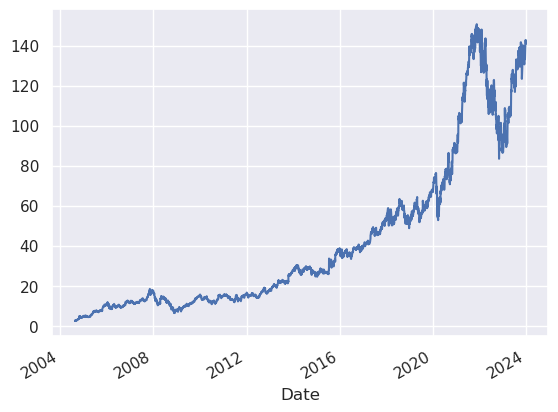

In [158]:
cprice.plot();

In [159]:
resampled = cprice.resample('BYE').mean()
resampled

Date
2004-12-31      3.780860
2005-12-30      6.918047
2006-12-29     10.241246
2007-12-31     13.418465
2008-12-31     11.577904
2009-12-31     10.951161
2010-12-31     13.340574
2011-12-30     14.171237
2012-12-31     16.010401
2013-12-31     22.023519
2014-12-31     27.990164
2015-12-31     30.100284
2016-12-30     37.174335
2017-12-29     46.089042
2018-12-31     55.661257
2019-12-31     59.419653
2020-12-31     74.070191
2021-12-31    125.530687
2022-12-30    115.193719
2023-12-29    119.611860
Freq: BYE-DEC, Name: Close, dtype: float64

In [160]:
freq = cprice.asfreq('BYE')
freq

Date
2004-12-31      4.801752
2005-12-30     10.332770
2006-12-29     11.469011
2007-12-31     17.222446
2008-12-31      7.662529
2009-12-31     15.441621
2010-12-31     14.793799
2011-12-30     16.087200
2012-12-31     17.618462
2013-12-31     27.913124
2014-12-31     26.247936
2015-12-31     37.944000
2016-12-30     38.591000
2017-12-29     52.320000
2018-12-31     51.780499
2019-12-31     66.850998
2020-12-31     87.594002
2021-12-31    144.679504
2022-12-30     88.730003
2023-12-29    140.929993
Freq: BYE-DEC, Name: Close, dtype: float64

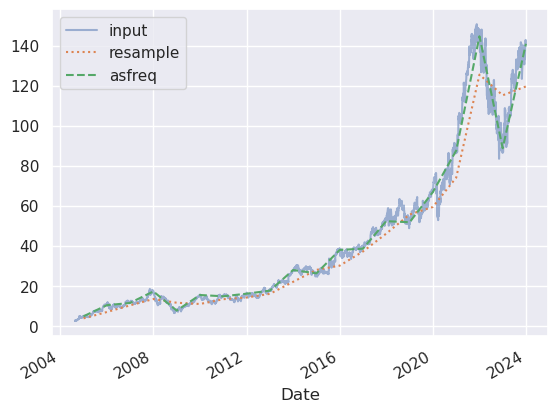

In [161]:
ax = cprice.plot(alpha=0.5, style='-')
resampled.plot(style=':', ax=ax)
freq.plot(style='--', ax=ax)
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

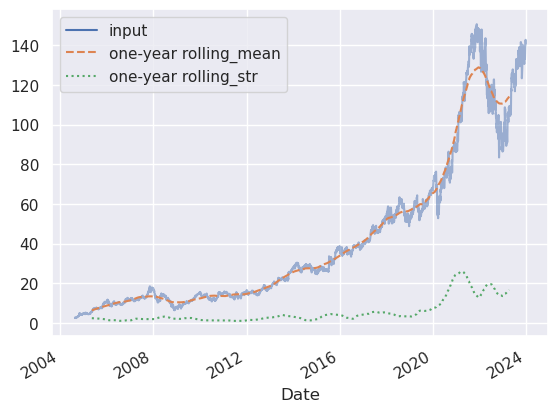

In [162]:
rolling = cprice.rolling(365, center=True)
data = pd.DataFrame({
    'input': cprice,
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_str': rolling.std(),
}, index=cprice.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.5);